In [59]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import numpy as np
import utils
from keras import Input
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# MNIST dataset params
num_classes = 10 # 0-9 digits
num_features = 784 # img shape: 28*28

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# convert to float32
X_train = np.array(X_train, np.float32)
X_test = np.array(X_test, np.float32)

# concatenate all data
X = np.concatenate([X_train, X_test])
y = np.concatenate([y_train, y_test])

# shuffle data
X, y = shuffle(X, y)

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# vectorize images
X_train = X_train.reshape([-1, num_features])
X_test = X_test.reshape([-1, num_features])

# normalize images values from [0, 255] to [0, 1]
X_train = X_train / 255.
X_test = X_test / 255.

# Convert target classes to categorical ones (one-hot encoding)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print("Training Inputs:")
utils.data_summary(X_train)

print("Testing Inputs:")
utils.data_summary(X_test)

print("Training Outputs:")
utils.data_summary(y_train)

print("Testing Outputs:")
utils.data_summary(y_test)


Training Inputs:
Shape = (56000, 784)
Minimum = 0.0
Maximum = 1.0
Range = 1.0
Variance = 0.09514896
Standard Deviation = 0.30846226

Testing Inputs:
Shape = (14000, 784)
Minimum = 0.0
Maximum = 1.0
Range = 1.0
Variance = 0.09510622
Standard Deviation = 0.30839297

Training Outputs:
Shape = (56000, 10)
Minimum = 0.0
Maximum = 1.0
Range = 1.0
Variance = 0.090000026
Standard Deviation = 0.30000004

Testing Outputs:
Shape = (14000, 10)
Minimum = 0.0
Maximum = 1.0
Range = 1.0
Variance = 0.09
Standard Deviation = 0.3



In [73]:
# network params
n_hidden_1 = 128
n_hidden_2 = 256

# create model
model = keras.Sequential(name="MLP")
model.add(Input(shape=(num_features,)))
model.add(keras.layers.Dense(name="hidden_layer_1", units=n_hidden_1, activation="relu"))
model.add(keras.layers.Dense(name="hidden_layer_2", units=n_hidden_2, activation="relu"))
model.add(keras.layers.Dense(name="output_layer", units=num_classes, activation="softmax"))

model.summary()

Model: "MLP"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer_1 (Dense)      (None, 128)               100480    
                                                                 
 hidden_layer_2 (Dense)      (None, 256)               33024     
                                                                 
 output_layer (Dense)        (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________


In [74]:
# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.CategoricalCrossentropy(), 
              metrics=['accuracy'])

# train model
history = model.fit(X_train, y_train, batch_size=256, epochs=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
219/219 [==============================] - 2s 5ms/step - loss: 0.3960 - accuracy: 0.8909 - val_loss: 0.1882 - val_accuracy: 0.9419
Epoch 2/100
219/219 [==============================] - 1s 4ms/step - loss: 0.1539 - accuracy: 0.9546 - val_loss: 0.1347 - val_accuracy: 0.9580
Epoch 3/100
219/219 [==============================] - 1s 4ms/step - loss: 0.1078 - accuracy: 0.9680 - val_loss: 0.1129 - val_accuracy: 0.9655
Epoch 4/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0827 - accuracy: 0.9754 - val_loss: 0.0966 - val_accuracy: 0.9689
Epoch 5/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0648 - accuracy: 0.9803 - val_loss: 0.0929 - val_accuracy: 0.9714
Epoch 6/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0518 - accuracy: 0.9844 - val_loss: 0.0775 - val_accuracy: 0.9749
Epoch 7/100
219/219 [==============================] - 1s 4ms/step - loss: 0.0408 - accuracy: 0.9875 - val_loss: 0.0885 - val_accuracy: 0.9719

438/438 [==============================] - 1s 2ms/step - loss: 0.1573 - accuracy: 0.9826


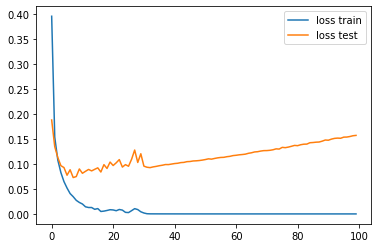

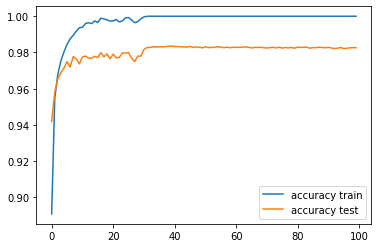

In [75]:
# results
train_results = model.evaluate(X_train, y_train)
test_results = model.evaluate(X_test, y_test)

loss_train = history.history["loss"]
loss_test = history.history["val_loss"]

accuracy_train = history.history["accuracy"]
accuracy_test = history.history["val_accuracy"]

import matplotlib.pyplot as plt

plt.plot(loss_train, label="loss train")
plt.plot(loss_test, label="loss test")
plt.legend()
plt.show()

plt.plot(accuracy_train, label="accuracy train")
plt.plot(accuracy_test, label="accuracy test")
plt.legend()
plt.show()